In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [87]:
from sklearn.metrics import classification_report
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
X = pd.DataFrame(data=[titanic.Pclass, titanic.Sex, titanic.Age, titanic.SibSp, titanic.Parch, titanic.Fare]).T
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22,1,0,7.25
1,1,female,38,1,0,71.2833
2,3,female,26,0,0,7.925
3,1,female,35,1,0,53.1
4,3,male,35,0,0,8.05


In [89]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  891 non-null    object
 1   Sex     891 non-null    object
 2   Age     714 non-null    object
 3   SibSp   891 non-null    object
 4   Parch   891 non-null    object
 5   Fare    891 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [91]:
X["Age"].isnull().sum()

177

In [92]:
# Let's replace these null values with there mode.
X['Age'] = X['Age'].fillna(np.mean(X['Age']))

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    object 
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    object 
 4   Parch   891 non-null    object 
 5   Fare    891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


In [94]:
X =pd.get_dummies(X, columns=["Sex"])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.25,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.925,1,0
3,1,35.0,1,0,53.1,1,0
4,3,35.0,0,0,8.05,0,1


In [95]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.25,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.925,1,0
3,1,35.0,1,0,53.1,1,0
4,3,35.0,0,0,8.05,0,1


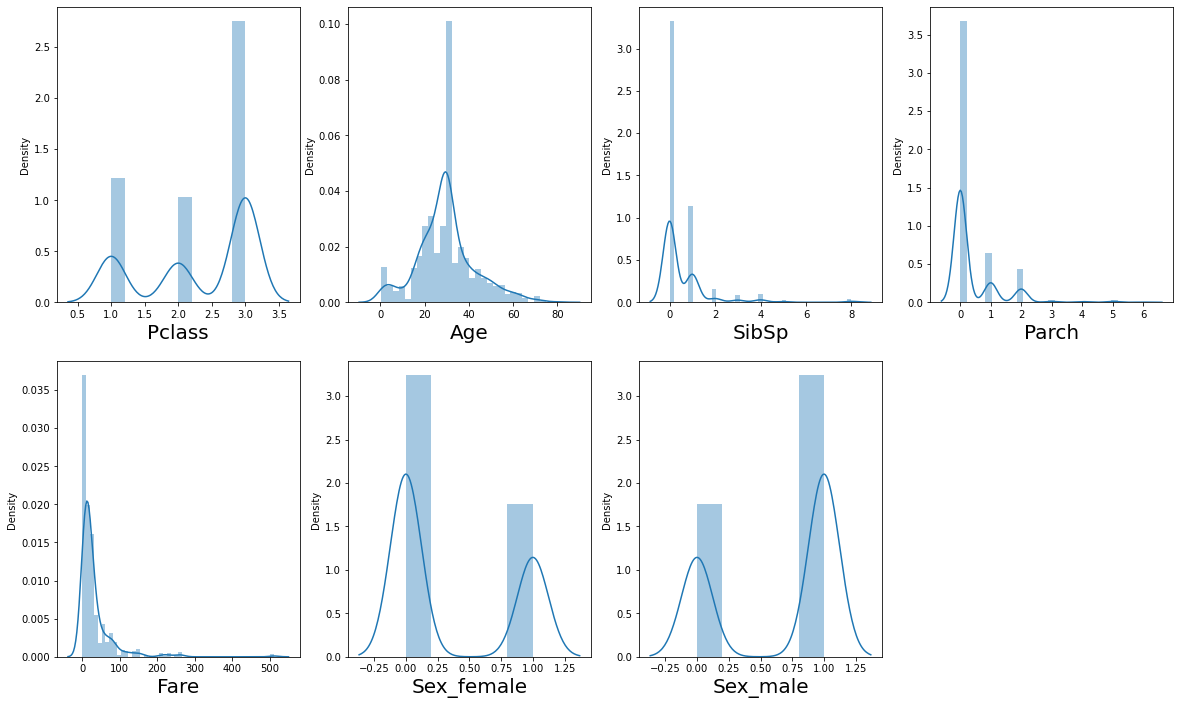

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(20, 25), facecolor= 'white')
plotnumber = 1

for column in X:
    if plotnumber <=13:
        ax = plt.subplot(4,4 ,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2)
xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
6,1,54.000000,0,0,51.8625,0,1
639,3,29.699118,1,0,16.1,0,1
308,2,30.000000,1,0,24,0,1
588,3,22.000000,0,0,8.05,0,1
277,2,29.699118,0,0,0,0,1


In [101]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',splitter='random')
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7932960893854749

In [103]:
from sklearn.metrics import accuracy_score, f1_score
preds =model.predict(xtest)
f1_score(preds, ytest)

0.7338129496402879